<a href="https://colab.research.google.com/github/Sahel-Eskandar/DataScience-Projects/blob/main/12_StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Price Prediction

Sahel Eskandar

Notes have been added before each section and explained the code.

Another model created for tuning hyperparameters in the next notebook.

Model in this notebook without hyperparameter tuning

Epoch 10/10
 - 18s - loss: 0.0104 - val_loss: 0.1616

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
nb_path = '/content/notebooks'
#os.symlink('/content/drive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Importing libraries

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  
import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

## Reading and Visualising data

In [ ]:
OUTPUT_PATH='/content/drive/My Drive/App'
INPUT_PATH='/content/drive/My Drive/App/inputs/AAPL.csv'

In [ ]:
data=pd.read_csv(INPUT_PATH)

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-01,1.502857,1.560714,1.500000,1.550714,1.034021,90384000
1,2009-12-02,1.542857,1.564286,1.529286,1.538571,1.025924,51324000
2,2009-12-03,1.538571,1.560000,1.497143,1.502143,1.001633,47824000
3,2009-12-04,1.495714,1.512143,1.483571,1.510714,1.007349,44485000
4,2009-12-05,1.492857,1.510714,1.480714,1.489286,0.993060,46544400


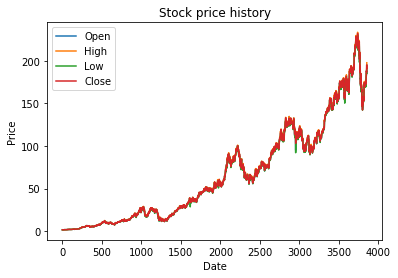

In [ ]:
plt.figure()
plt.plot(data["Open"])
plt.plot(data["High"])
plt.plot(data["Low"])
plt.plot(data["Close"])
plt.title('Stock price history')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

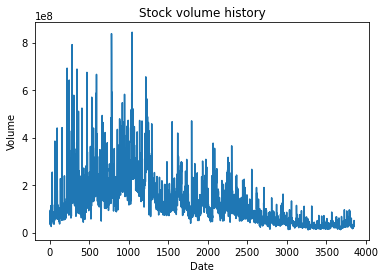

In [ ]:
plt.figure()
plt.plot(data["Volume"])
plt.title('Stock volume history')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.show()

## Checking for null values

In [ ]:
print("checking if any null values are present\n", data.isna().sum())

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Cutting dataset from the beginning for training and leaving the end for testing


In [ ]:
print("data base:", len(data))
db = data.iloc[:,1:2].values
data_train=db[0:3083,:]
print("data_train:", len(data_train))
data.head()

data base: 3853
data_train: 3083


,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-12-01,1.502857,1.560714,1.500000,1.550714,1.034021,90384000
1,2009-12-02,1.542857,1.564286,1.529286,1.538571,1.025924,51324000
2,2009-12-03,1.538571,1.560000,1.497143,1.502143,1.001633,47824000
3,2009-12-04,1.495714,1.512143,1.483571,1.510714,1.007349,44485000
4,2009-12-05,1.492857,1.510714,1.480714,1.489286,0.993060,46544400


## Normalizing and arranging data for time steps

Scale data to a range of 0 to 1 and then the scale has been kept for final prediction inverse

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scale= MinMaxScaler(feature_range=(0,1))

data_train_scaled= scale.fit_transform(data_train)


Predict the opening stock price of the data based on the opening stock prices for the past 60 days. So, we set time steps to 60 days and cut each 60 days in one data and assume day of 60 as our output

In [ ]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(data_train_scaled[i-60:i, 0])
    y_train.append(data_train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Creating LSTM Model 

Add 3 LSTM layer and a dense layer a last layer of the model

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense 

Using TensorFlow backend.


In [ ]:
model = Sequential()

model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')

model.fit(X_train,y_train,epochs=40,batch_size=32)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/40





1975/1975 [==============================] - 32s 16ms/step - loss: 0.0030
Epoch 2/40
1975/1975 [==============================] - 21s 11ms/step - loss: 6.1083e-04
Epoch 3/40
1975/1975 [==============================] - 21s 11ms/step - loss: 4.9703e-04
Epoch 4/40
1975/1975 [==============================] - 21s 11ms/step - loss: 4.6679e-04
Epoch 5/40
1975/1975 [==============================] - 21s 10ms/step - loss: 4.5108e-04
Epoch 6/40
1975/1975 [==============================] - 22s 11ms/step - loss: 4.0864e-04
Epoch 7/40
1975/1975 [==============================] - 22s 11ms/step - loss: 4.9298e-04
Epoch 8/40
1975/1975 [==============================] - 22s 11ms/step - loss: 4.2031e-04
Epoch 9/40
1975/1975 [==============================] - 22s 11ms/step 

## **Test Dataset**

From the data set, 20 % portion of data from the end were put aside for testing and evaluating the model.

In [ ]:
data_test=db[3083:3853,:]
print("data_test:", len(data_test))

data_test_scaled=scale.fit_transform(data_test)

data_test: 770


Because our model predicts price for 60 days ahead. so to compare the predicted value with the real one, we consider real data series from day 60 to the end 

In [ ]:
real_stock_price = db[3143:3853,:]
print("real_stock_price:", len(real_stock_price))

real_stock_price: 710


In [ ]:
X_test = []
y_test = []
for i in range(60,len(data_test_scaled)):
    X_test.append(data_test_scaled[i-60:i, 0])
    y_test.append(data_test_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print("X_test:", len(X_test))

X_test: 710


## **Predicting values** 

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price.shape

predicted_stock_price = scale.inverse_transform(predicted_stock_price)

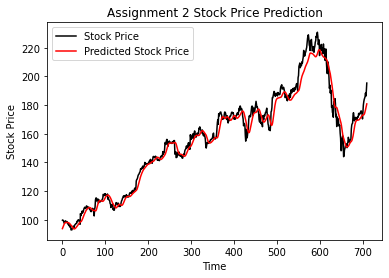

In [ ]:
plt.plot(real_stock_price, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'r', label = 'Predicted Stock Price')
plt.title('Assignment 2 Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()